In [1]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


학습데이타 준비 및 이미지 전처리

In [2]:
import time
start = time.time() # 시작 시간 저장

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [4]:
batch_size = 16
input_image_size = (200, 200)

train_generator = train_datagen.flow_from_directory(
    '/drive/My Drive/Colab Notebooks/caltech101',
    target_size = input_image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/drive/My Drive/Colab Notebooks/caltech101',
    target_size = input_image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation'
)

Found 6982 images belonging to 101 classes.
Found 1695 images belonging to 101 classes.


In [5]:
from keras.layers import Dense, Input, Activation, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Model, Sequential

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(101))
model.add(Activation('softmax'))
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fbcaae469b0>>

In [7]:
from keras import optimizers

model.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [8]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=15, mode='auto', monitor='val_acc')
hist = model.fit_generator(train_generator,
                           steps_per_epoch=train_generator.samples // batch_size,
                           validation_data = validation_generator,
                           epochs=100,
                           callbacks=[early_stopping]
                           )


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
436/436 [==============================] - 3942s 9s/step - loss: 3.2408 - acc: 0.3333 - val_loss: 2.4547 - val_acc: 0.4543
Epoch 2/100
436/436 [==============================] - 26s 59ms/step - loss: 1.9043 - acc: 0.5531 - val_loss: 1.9486 - val_acc: 0.5563
Epoch 3/100
436/436 [==============================] - 26s 59ms/step - loss: 1.0480 - acc: 0.7456 - val_loss: 1.7376 - val_acc: 0.5965
Epoch 4/100
436/436 [==============================] - 26s 59ms/step - loss: 0.4934 - acc: 0.8929 - val_loss: 1.6150 - val_acc: 0.6242
Epoch 5/100
436/436 [==============================] - 26s 59ms/step - loss: 0.2154 - acc: 0.9618 - val_loss: 1.6024 - val_acc: 0.6265
Epoch 6/100
436/436 [==============================] - 26s 59ms/step - loss: 0.1123 - acc: 0.9806 - val_loss: 1.6343 - val_acc: 0.6330
Epoch 7/100
436/436 [==============================] - 26s 59ms/step - loss: 0.0571 - acc: 0.9921 - val_loss: 1.61

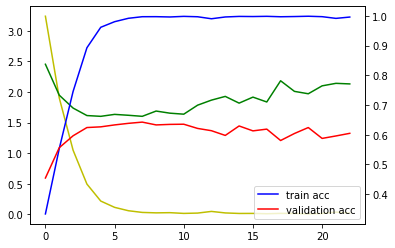

In [9]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'r', label='validation acc')

plt.legend(['train acc', 'validation acc'])
plt.show()

In [10]:
print("실행시간 :", round(time.time() - start, 2),"(초)")  # 현재시각 - 시작시간 = 실행 시간

실행시간 : 4570.8 (초)
